## Task 1

### Question

Consider polynomial regression models for the target variable `mpg` based on the input variable `horsepower`. Train these models and provide plots to depict the fit of them on the training data.

### Solution

#### Loading Libraries

First, we load the necessary libraries and set a seed for reproducibility.


In [1]:
set.seed(100)                 # For reproducibility
library(ISLR)                 # Contains the 'Auto' dataset
library(mlr3verse)            # Core ML framework (includes mlr3, mlr3learners, etc.)
library(caret)                # For KNN models and related utilities
library(RColorBrewer)         # For color palettes in plots
library(data.table)
library(ggpubr)

Loading required package: mlr3

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# Generate a palette of distinct colors
colours <- brewer.pal(4, "Set1")

#### Reading and Exploring the Data

We import the data and explore its structure.

In [3]:
Auto <- ISLR2::Auto
summary(Auto) # Statistical summary of each variable
dim(Auto) # Dimension (rows and columns)
head(Auto)
str(Auto) # Structure of the dataset, including variable types and a preview of values


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

[1] 392   9

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:5] 33 127 331 337 355
  ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...


#### Visualizing the Target Variable

We visualize the distribution of `mpg` to understand its variability.


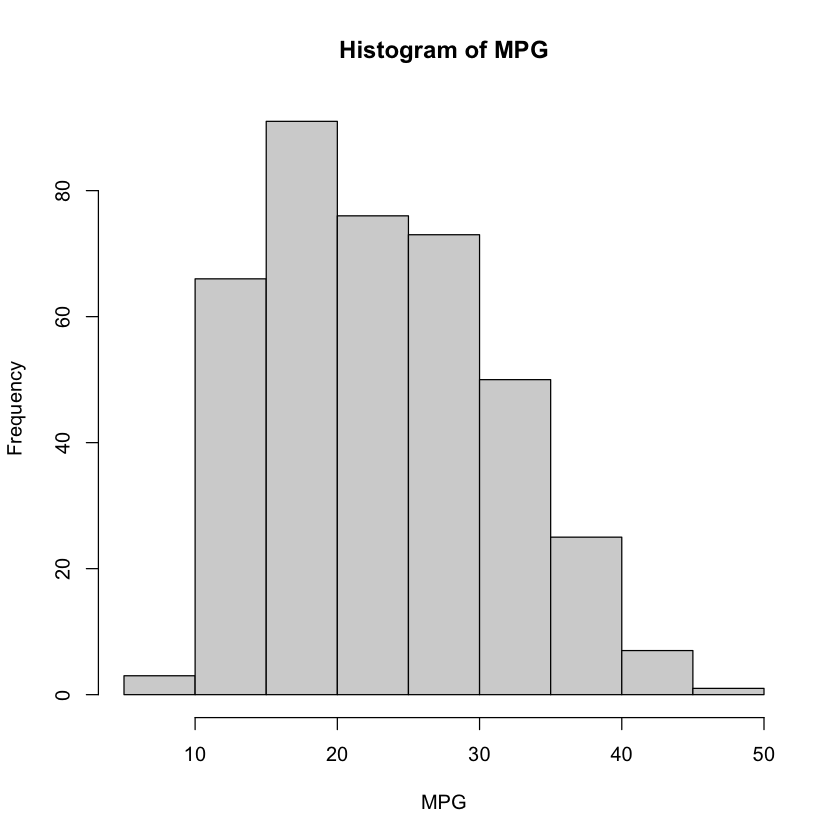

In [4]:
hist(Auto$mpg, main = "Histogram of MPG", xlab = "MPG")

#### Sorting the Data by Horsepower


In [5]:
# Auto_sorted <- Auto[order(Auto$horsepower), ]
# Auto_sorted

#### Defining Input and Target Variables

We define `horsepower` as our input variable `x` and `mpg` as our target variable `y`.

In [6]:
x <- Auto$horsepower
y <- Auto$mpg

#### Fitting Polynomial Regression Models

##### Linear Model (Degree 1)

We fit a linear regression model.

In [7]:
fit1 <- lm(y ~ x)
summary(fit1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
x           -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


##### Quadratic Model (Degree 2)
We fit a quadratic polynomial regression model.

In [8]:
fit2 <- lm(y ~ x + I(x^2))
summary(fit2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 56.9000997  1.8004268   31.60   <2e-16 ***
x           -0.4661896  0.0311246  -14.98   <2e-16 ***
I(x^2)       0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


##### Cubic Model (Degree 3)

We fit a cubic polynomial regression model.

In [9]:
fit3 <- lm(y ~ x + I(x^2) + I(x^3))
summary(fit3)


Call:
lm(formula = y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7039  -2.4491  -0.1519   2.2035  15.8159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.068e+01  4.563e+00  13.298  < 2e-16 ***
x           -5.689e-01  1.179e-01  -4.824 2.03e-06 ***
I(x^2)       2.079e-03  9.479e-04   2.193   0.0289 *  
I(x^3)      -2.147e-06  2.378e-06  -0.903   0.3673    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.375 on 388 degrees of freedom
Multiple R-squared:  0.6882,	Adjusted R-squared:  0.6858 
F-statistic: 285.5 on 3 and 388 DF,  p-value: < 2.2e-16


#### Predictive Functions Using a Sequence of horsepower Values

Instead of sorting the original data, we'll generate a sequence of horsepower values to ensure smooth curves when plotting.


In [10]:
# Generate a sequence of horsepower values for smooth plotting
x_seq <- seq(min(x), max(x), length.out = 300)

# Predict 'mpg' using the fitted models over the sequence
pol1_seq <- predict(fit1, newdata = data.frame(x = x_seq))
pol2_seq <- predict(fit2, newdata = data.frame(x = x_seq))
pol3_seq <- predict(fit3, newdata = data.frame(x = x_seq))


# Alternative approach with Auto_sorted <- Auto[order(Auto$horsepower), ]
# Here pol1, pol2, pol3 are functions(x) !!!
# pol1 <- function(x) predict(fit1, data.frame(x = x)) 
# pol2 <- function(x) predict(fit2, data.frame(x = x))
# pol3 <- function(x) predict(fit3, data.frame(x = x))

#### Plotting the Models

We plot the data and overlay the fitted models.

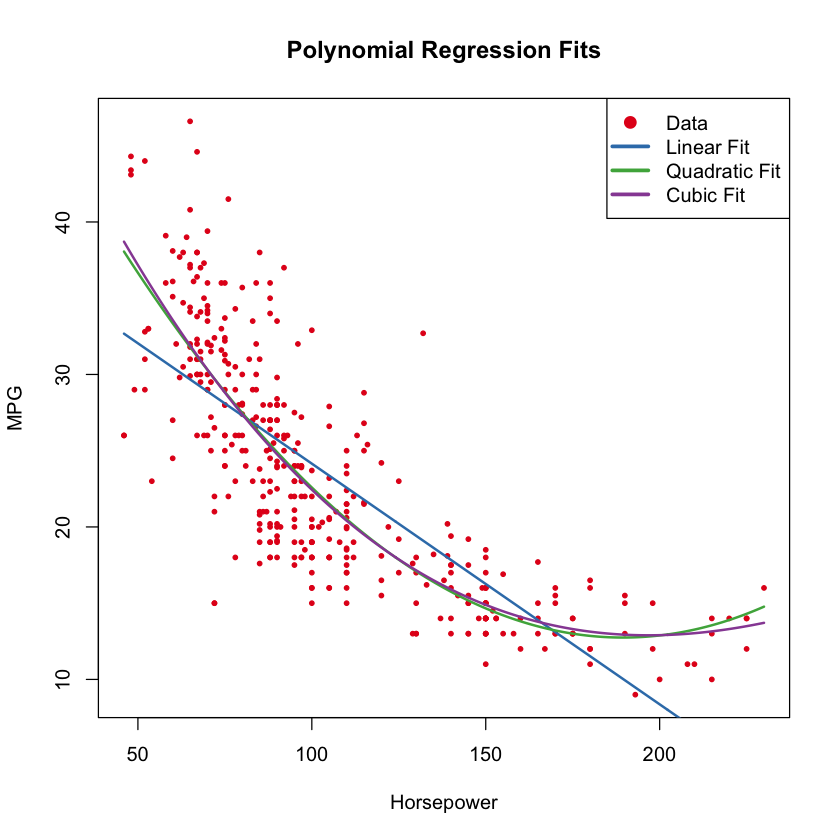

In [11]:
plot(x, y, col = colours[1], pch = 19, cex = 0.5, # Adjust point size with cex
     xlab = "Horsepower", ylab = "MPG", main = "Polynomial Regression Fits")
lines(x_seq, pol1_seq, col = colours[2], lwd = 2)
lines(x_seq, pol2_seq, col = colours[3], lwd = 2)
lines(x_seq, pol3_seq, col = colours[4], lwd = 2)
legend("topright",
       legend = c("Data", "Linear Fit", "Quadratic Fit", "Cubic Fit"),
       col = colours, # Specifies the colors for the legend items
       pch = c(19, NA, NA, NA), # Symbol for points (solid circle for data)
       lty = c(NA, 1, 1, 1), # Line types for fits (solid lines)
       lwd = 3) # Line width for fits

**Explanation:**

- **Linear Fit**: A straight line attempting to capture the relationship between `horsepower` and `mpg`.
- **Cubic Fit**: A more flexible curve that can capture nonlinear relationships.


#### Calculating Mean Squared Errors

We compute the mean squared error (MSE) for each model to assess their fit.


In [12]:
mse1 <- mean((y - predict(fit1, newdata = data.frame(x = x)))^2)
mse2 <- mean((y - predict(fit2, newdata = data.frame(x = x)))^2)
mse3 <- mean((y - predict(fit3, newdata = data.frame(x = x)))^2)
paste("MSE for Linear Model:", round(mse1, 2))
paste("MSE for Quadratic Model:", round(mse2, 2))
paste("MSE for Cubic Model:", round(mse3, 2))

[1] "MSE for Linear Model: 23.94"

[1] "MSE for Quadratic Model: 18.98"

[1] "MSE for Cubic Model: 18.94"

**Interpretation:**

- The cubic model has a lower MSE, indicating a better fit to the data.
- However, we need to be cautious about overfitting, which we'll address in Task 2.

## Task 2

### Question

Compare polynomial models of varying degrees (1, 2, 3, and 9) using cross-validation to estimate test error. This helps identify which polynomial degree generalizes best.


### Solution

#### Preparing the Data and Tasks

We create regression tasks for polynomial degrees 1, 2, 3, and 9.

In [13]:
tasks <- list()
degrees <- c(1, 2, 3, 9) # Define the degrees of the polynomial models to evaluate

for (degree in degrees) {
    data <- data.frame(y = y, x = x) # Initialize dataframe with target and input
    if (degree > 1) { # Add polynomial terms if degree > 1
      for (d in 2:degree) {
            data[[paste0("x", d)]] <- x^d
        }
    }
    # Create a regression task for each polynomial degree
    task_id <- paste0("poly", degree)
    tasks[[task_id]] <- TaskRegr$new(id = task_id, backend = data, target = "y")
}

#### Defining the Learner and Resampling Strategy

We use linear regression and 3-fold cross-validation.

In [14]:
# Define the learner: Linear Regression Model
learner <- lrn("regr.lm")
# Define a 3-fold cross-validation resampling strategy
resampling <- rsmp("cv", folds = 3)

#### Benchmarking the Models

We set up a benchmark experiment to compare models.

In [15]:
# Create a benchmark design combining tasks, learner, and resampling
design <- benchmark_grid(
    tasks = tasks,
    learners = learner,
    resamplings = resampling
)

# Execute the benchmark
bmr <- benchmark(design)

INFO  [03:09:48.833] [mlr3] Running benchmark with 12 resampling iterations
INFO  [03:09:48.892] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 1/3)
INFO  [03:09:48.908] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 2/3)
INFO  [03:09:48.916] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 3/3)
INFO  [03:09:48.923] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 1/3)
INFO  [03:09:48.929] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 2/3)
INFO  [03:09:48.936] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 3/3)
INFO  [03:09:48.943] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 1/3)
INFO  [03:09:48.950] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 2/3)
INFO  [03:09:48.957] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 3/3)
INFO  [03:09:48.964] [mlr3] Applying learner 'regr.lm' on task 'poly9' (iter 1/3)
INFO  [03:09:48.971] [mlr3] Applying learner 'regr.lm' on task 'poly9' (iter 2/3)
INFO  [03:09:48.979] [

#### Evaluating the Models

We use MSE to evaluate model performance.


In [16]:
# Define the performance measure: Mean Squared Error (MSE)
measure <- msr("regr.mse")
# Aggregate the benchmark results to compute average MSE for each model
results <- bmr$aggregate(measure)
print(results[, c("task_id", "regr.mse")])

   task_id regr.mse
    <char>    <num>
1:   poly1 24.09752
2:   poly2 19.17448
3:   poly3 19.28045
4:   poly9 19.25015


#### Visualizing the Results

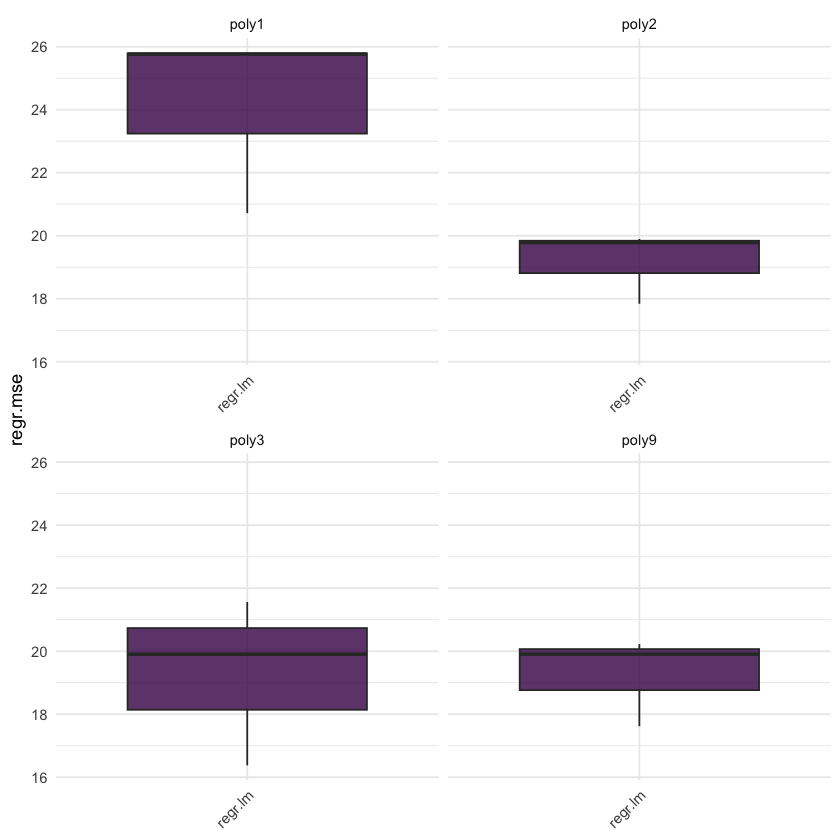

In [17]:
# Plot the benchmark results for comparison
autoplot(bmr) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Interpretation:**

- Models with higher degrees may have lower training error but higher test error due to overfitting.
- Cross-validation helps estimate the test error to select the best model.


#### `ggpubr`
Violin plot with embedded box plots using your dataset, and to add significance levels, you can utilize the `ggpubr` package in R

In [18]:
# Extract task-specific MSE from benchmark using MSE measure (loss function)
results <- bmr$score(msr("regr.mse"))

# Convert results to data.table
results_dt <- as.data.table(results)

# Prepare the data
plot_data <- results_dt[, .(
  Tasks = as.factor(task_id),  # Convert task_id to factor
  MSE = regr.mse                           # Rename regr.mse to MSE
)]

##### Define comparisons
Define the pairs of polynomial degrees you want to compare:

In [19]:
# Define comparisons for statistical tests
my_comparisons <- list(
  c("poly2", "poly3"),
  c("poly3", "poly9"),
  c("poly2", "poly9")
)

##### Create the Violin Plot with Box Plots and Significance Levels
Use the `ggpubr package to create the plot:

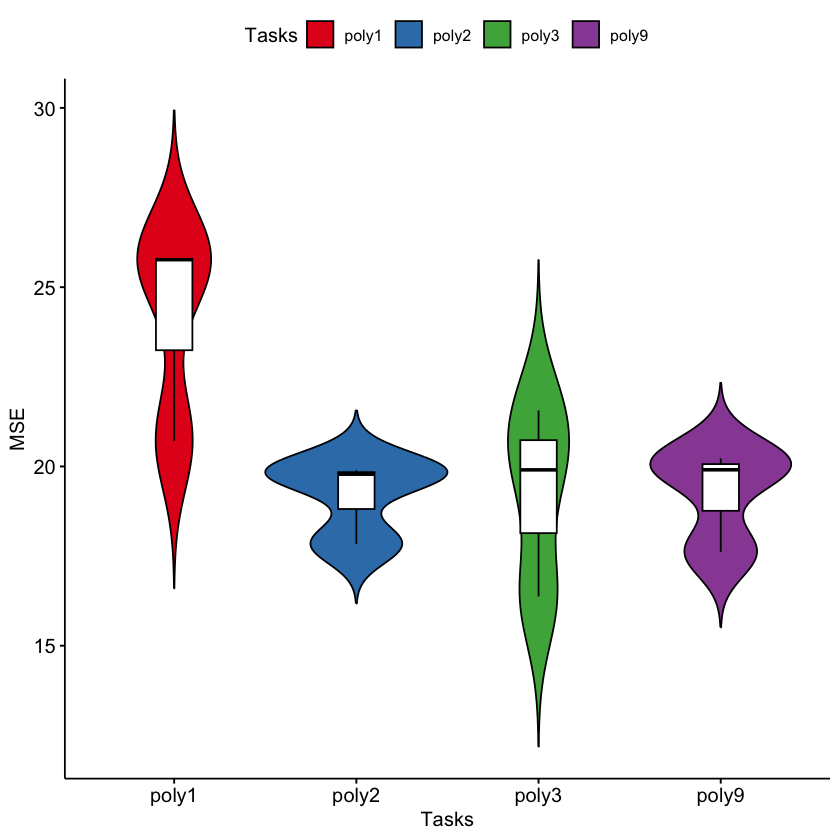

In [20]:
library(ggpubr)

# Create the violin plot
ggviolin(plot_data, x = "Tasks", y = "MSE", fill = "Tasks",
         palette = colours,
         add = "boxplot", add.params = list(fill = "white"))


## Task 3

### Question

Apply the k-nearest neighbors model with `horsepower` and `weight` as inputs and `origin` as the target. Split the data into a train and test sample, train models with different values of `k`, extract predictions from these models, and compare them graphically on the test data.


### Solution

#### Loading Necessary Libraries


In [21]:
library(caret)        # For KNN

In [22]:
x <- Auto[, c("horsepower", "weight")]
y <- as.factor(Auto$origin)

#### Visualizing the Data

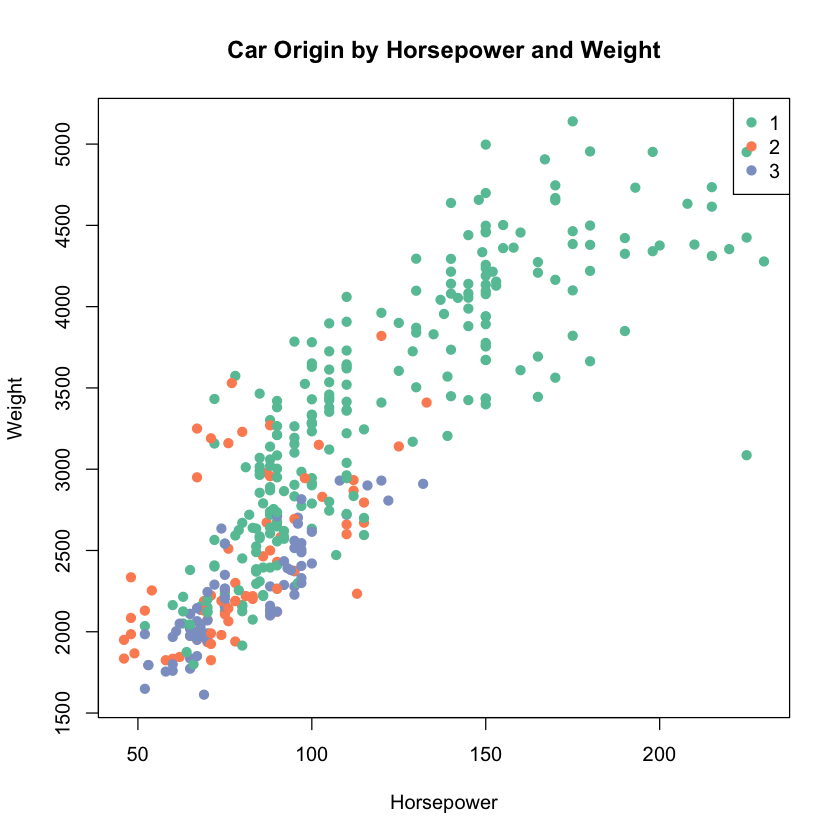

In [23]:
colours <- brewer.pal(3, "Set2")
plot(x, col = colours[y], pch = 19, xlab = "Horsepower", ylab = "Weight", main = "Car Origin by Horsepower and Weight")
legend("topright", legend = levels(y), col = colours, pch = 19)

**Explanation:**

- The plot visualizes the distribution of car origins in the feature space.
- It helps in understanding the separability of classes.

#### Splitting the Data into Training and Test Sets

In [24]:
set.seed(100)
train_idx <- sample(seq_len(nrow(Auto)), size = floor(0.67 * nrow(Auto)))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test <- x[-train_idx, ]
y_test <- y[-train_idx]

#### Training KNN Models with Different k Values


In [25]:
k_values <- c(1, 3, 10, 25)
knn_models <- list()

for (k in k_values) {
    knn_models[[paste0("k", k)]] <- knn3(x_train, y_train, k = k)
}

#### Making Predictions on the Test Set

In [26]:
predictions <- list()

for (k in k_values) {
    model <- knn_models[[paste0("k", k)]]
pred <- predict(model, x_test, type = "class")
predictions[[paste0("k", k)]] <- pred
}

#### Evaluating the Models

We compute the classification accuracy for each k.

In [27]:
accuracy <- sapply(predictions, function(pred) {
    mean(pred == y_test)
})
print(accuracy)

       k1        k3       k10       k25 
0.7230769 0.6538462 0.6923077 0.7153846 



**Interpretation:**

- Accuracy varies with different values of `k`.
- Smaller `k` may lead to overfitting, while larger `k` may underfit.

#### Visualizing the Predictions


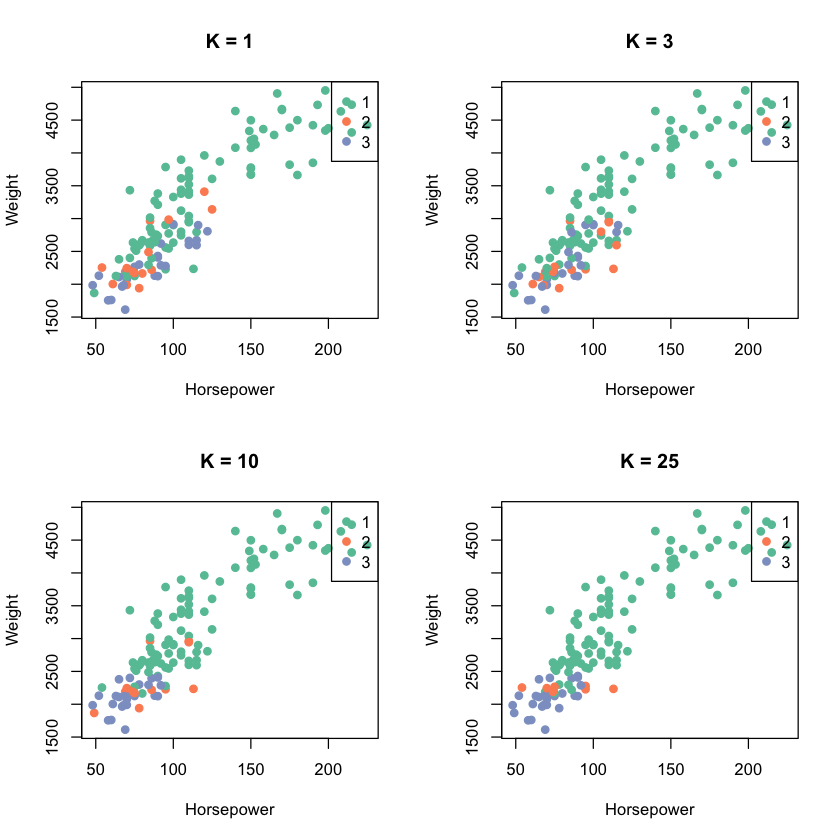

In [28]:
par(mfrow = c(2, 2))
for (k in k_values) {
    pred <- predictions[[paste0("k", k)]]
plot(x_test, col = colours[pred], pch = 19, xlab = "Horsepower", ylab = "Weight", main = paste("K =", k))
legend("topright", legend = levels(y), col = colours, pch = 19)
}
par(mfrow = c(1, 1))


**Explanation:**

- The plots show how the predicted class labels change with different `k`.
- Visual comparison aids in understanding the model's performance spatially.

#### Alternative Method for Computing Accuracy

We define a function for classification accuracy.


In [29]:
calc_class_accuracy <- function(actual, predicted) {
    mean(actual == predicted)
}

Calculating accuracy using the function:

In [30]:
for (k in k_values) {
    pred <- predictions[[paste0("k", k)]]
acc <- calc_class_accuracy(y_test, pred)
cat("Accuracy for k =", k, ":", round(acc, 4), "\n")
}

Accuracy for k = 1 : 0.7231 
Accuracy for k = 3 : 0.6538 
Accuracy for k = 10 : 0.6923 
Accuracy for k = 25 : 0.7154 



## Conclusion

In this assignment, we:

- Explored polynomial regression models of different degrees to predict `mpg` based on `horsepower`.
- Used cross-validation to select the best polynomial degree, balancing model complexity and generalization.
- Applied KNN classification to predict the origin of cars using `horsepower` and `weight`.
- Observed how varying `k` affects the KNN model's performance, illustrating the bias-variance trade-off.

**Key Takeaways:**

- **Model Complexity:** Higher-degree polynomials can fit training data better but may overfit, leading to poor test performance.
- **Cross-Validation:** Essential for estimating test error and selecting models that generalize well.
- **KNN Sensitivity:** The choice of `k` in KNN significantly impacts model bias and variance.
